Get the Haar-like features

from skimage.io import imshow, imread
from skimage.feature import hog
from skimage import exposure
import skimage.transform as transform
import skimage.io
import skimage.exposure
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import cv2

def read_data(folder_path):
    X = []
    y = []

    for class_label in range(43):
        class_folder = os.path.join(folder_path, str(class_label))
        
        for file_name in os.listdir(class_folder):
            if file_name.endswith(".ppm"):
                file_path = os.path.join(class_folder, file_name)
                
                # Code snippet for Haar-like features
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (40, 40))
                
                # Load the pre-trained Haar cascade classifier
                cascade_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
                
                haar_features = cascade_classifier.detectMultiScale(img_resized, scaleFactor=1.1, minNeighbors=5)
                haar_features_array = np.array(haar_features).reshape(-1)
                X.append(haar_features_array)
                y.append(class_label)

    return np.array(X), np.array(y)

folder_path_train = "/home/jovyan/DATA/dataset_folder_train_images/GTSRB/Final_Training/Images"

X, y = read_data(folder_path_train)

In [16]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from dask import delayed

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

@delayed
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)


img = skimage.io.imread('00000.ppm', plugin='matplotlib')
img_gray = skimage.color.rgb2gray(img)
reshaped_img = transform.resize(img_gray, (40, 40))
normalized_image = skimage.exposure.rescale_intensity(reshaped_img, in_range='image', out_range=(0, 1))
# To speed up the example, extract the two types of features only
feature_types = ['type-2-x', 'type-2-y']

# Build a computation graph using Dask. This allows the use of multiple
# CPU cores later during the actual computation
X = delayed(extract_feature_image(img, feature_types) for img in normalized_image)
# Compute the result
t_start = time()
X = np.array(X.compute(scheduler='single-threaded'))
time_full_feature_comp = time() - t_start

# Label images (100 faces and 100 non-faces)
y.append(class_label)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150,
                                                    random_state=0,
                                                    stratify=y)

# Extract all possible features
feature_coord, feature_type = \
    haar_like_feature_coord(width=images.shape[2], height=images.shape[1],
                            feature_type=feature_types)

IndexError: tuple index out of range

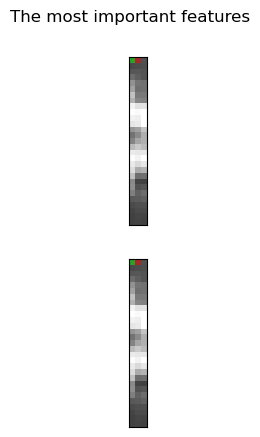

In [14]:
feature_coord

array([list([[(0, 0), (0, 0)], [(0, 1), (0, 1)]]),
       list([[(0, 0), (1, 0)], [(0, 1), (1, 1)]]),
       list([[(0, 0), (2, 0)], [(0, 1), (2, 1)]]), ...,
       list([[(27, 1), (27, 1)], [(28, 1), (28, 1)]]),
       list([[(27, 1), (27, 2)], [(28, 1), (28, 2)]]),
       list([[(27, 2), (27, 2)], [(28, 2), (28, 2)]])], dtype=object)